In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import xml.etree.ElementTree as et
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from pylab import rcParams
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import collections
import os
import re
import string
import tqdm
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from nltk.corpus import stopwords
import xgboost
import six
import sys
import keras
sys.modules['sklearn.externals.six'] = six
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,HashingVectorizer
from sklearn import decomposition, ensemble
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,f1_score

import imblearn

# Packages for data preparation
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Embedding
from keras.layers import Bidirectional

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import numpy as np 
import pandas as pd
import string
from tqdm import tqdm
import tensorflow as tf
import math,nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import  hstack
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, concatenate,Flatten,LSTM, Embedding, Input,Dropout
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import os
import re
import nltk
import string
import numpy as np
from sklearn import feature_extraction
from tqdm import tqdm
from keras.models import load_model
from sklearn.model_selection import train_test_split 
import itertools 
from sklearn.preprocessing import LabelBinarizer,label_binarize
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout,Embedding,LSTM
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score,mean_squared_error,roc_auc_score,roc_curve,auc, f1_score
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout,Embedding,GlobalMaxPooling1D, MaxPooling1D, Add, Flatten
from keras import regularizers
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
xml = '/content/drive/MyDrive/Aspect_Based_Sentiment_Analysis/Data/ABSA16_Laptops_Train_SB1_v2.xml'
  

def xml2datadrame(xml):
    dataset = []                                              
    root = et.parse(xml).getroot()  

    for i in root:
      for review in i:
        for sen in review:
          try:
            for txt1 in sen.iter('text'):
              t = txt1.text
            for txt1 in sen.iter('Opinion'):
                category = txt1.attrib["category"]
                polarity = txt1.attrib["polarity"]
                #aspect = txt1.attrib["target"]

                row = {"text": t,"aspect category":category,"polarity":polarity}   
                dataset.append(row)

          except IndexError: 
              row = {"sentence": t}        
              dataset.append(row)  
          
    return pd.DataFrame(dataset)
           

Laptop_df = xml2datadrame(xml)
Laptop_df_new = Laptop_df[Laptop_df['text'].str.contains("\n") == False]
Laptop_df_new.head(10)
#len(Laptop_df_new)

,text,aspect category,polarity
0,This computer is absolutely AMAZING!!!,LAPTOP#GENERAL,positive
1,10 plus hours of battery...,BATTERY#OPERATION_PERFORMANCE,positive
2,super fast processor and really nice graphics ...,CPU#OPERATION_PERFORMANCE,positive
3,super fast processor and really nice graphics ...,GRAPHICS#GENERAL,positive
4,and plenty of storage with 250 gb(though I wil...,HARD_DISC#DESIGN_FEATURES,positive
5,This computer is really fast and I'm shocked a...,LAPTOP#OPERATION_PERFORMANCE,positive
6,This computer is really fast and I'm shocked a...,LAPTOP#USABILITY,positive
7,I've only had mine a day but I'm already used ...,LAPTOP#USABILITY,positive
8,GET THIS COMPUTER FOR PORTABILITY AND FAST PRO...,LAPTOP#PORTABILITY,positive
9,GET THIS COMPUTER FOR PORTABILITY AND FAST PRO...,CPU#OPERATION_PERFORMANCE,positive


In [ ]:
xml = '/content/drive/MyDrive/Aspect_Based_Sentiment_Analysis/Data/EN_LAPT_SB1_TEST_.xml'
  
def xml2datadrame(xml):
    dataset = []                                              
    root = et.parse(xml).getroot()  

    for i in root:
      for review in i:
        for sen in review:
          try:
            for txt1 in sen.iter('text'):
              t = txt1.text

            row = {"text": t}   
            dataset.append(row)

          except IndexError: 
              row = {"sentence": t}        
              dataset.append(row)  
          
    return pd.DataFrame(dataset)
           

Laptop_df = xml2datadrame(xml)
test = Laptop_df[Laptop_df['text'].str.contains("\n") == False]
test.head(10)

,text
0,"Well, my first apple computer and I am impressed."
1,"Works well, fast and no reboots."
2,Waiting to install MS Office and see how it go...
3,"Have always been a PC guy, but decided to try ..."
4,Glad I did so far.
5,s.... L .... o..... w.... rea......llllyy slow.
6,like seriously - really slow.
7,impossible to use.
8,cant even read properly.
9,plus - no russian input ?? wtf


In [ ]:
Laptop_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2909 entries, 0 to 2908
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             2909 non-null   object
 1   aspect category  2909 non-null   object
 2   polarity         2909 non-null   object
dtypes: object(3)
memory usage: 90.9+ KB


In [ ]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(COLORS_PALETTE))

rcParams['figure.figsize'] = 6, 8

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


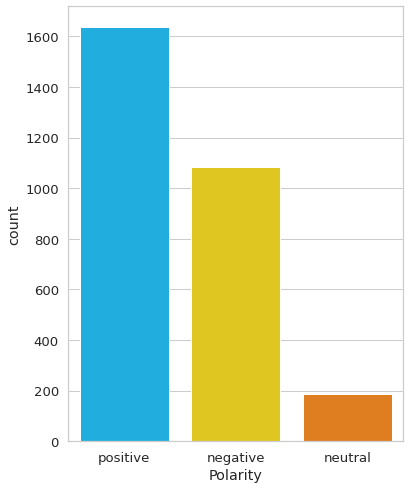

In [ ]:
sns.countplot(Laptop_df_new.polarity)
plt.xlabel('Polarity');

In [ ]:
#handling categorical value : Converting the polarity into integers-1(Negative), 0(Neutral) and 1(positive) sentiment:
def to_sentiment(rating):
  #rating = int(rating)
  if rating == "positive":
    return 1
  elif rating == "negative":
    return -1
  else: 
    return 0

Laptop_df_new['polarity'] = Laptop_df_new.polarity.apply(to_sentiment)

In [ ]:
Laptop_df_new

,text,aspect category,polarity
0,This computer is absolutely AMAZING!!!,LAPTOP#GENERAL,1
1,10 plus hours of battery...,BATTERY#OPERATION_PERFORMANCE,1
2,super fast processor and really nice graphics ...,CPU#OPERATION_PERFORMANCE,1
3,super fast processor and really nice graphics ...,GRAPHICS#GENERAL,1
4,and plenty of storage with 250 gb(though I wil...,HARD_DISC#DESIGN_FEATURES,1
...,...,...,...
2904,"I would recommend it, for anybody needing a re...",LAPTOP#QUALITY,1
2905,I bought this for my daughter to use for schoo...,LAPTOP#OPERATION_PERFORMANCE,0
2906,I bought this for my daughter to use for schoo...,LAPTOP#DESIGN_FEATURES,1
2907,I bought this for my daughter to use for schoo...,LAPTOP#GENERAL,1


In [ ]:
Laptop_df_new['aspect category'].value_counts()

LAPTOP#GENERAL                  634
LAPTOP#OPERATION_PERFORMANCE    278
LAPTOP#DESIGN_FEATURES          253
LAPTOP#QUALITY                  224
LAPTOP#MISCELLANEOUS            142
                               ... 
FANS_COOLING#DESIGN_FEATURES      1
SOFTWARE#PRICE                    1
CPU#MISCELLANEOUS                 1
PORTS#DESIGN_FEATURES             1
CPU#DESIGN_FEATURES               1
Name: aspect category, Length: 81, dtype: int64

In [ ]:
# Get the count of each value
value_counts = Laptop_df_new['aspect category'].value_counts()

# Select the values where the count is less than 3 (or 5 if you like)
to_remove = value_counts[value_counts <= 20].index

# Keep rows where the city column is not in to_remove
Laptop_df_new = Laptop_df_new[~Laptop_df_new['aspect category'].isin(to_remove)]

In [ ]:
Laptop_df_new.shape

(2547, 3)

In [ ]:
Laptop_df_new['aspect category'].value_counts()

LAPTOP#GENERAL                   634
LAPTOP#OPERATION_PERFORMANCE     278
LAPTOP#DESIGN_FEATURES           253
LAPTOP#QUALITY                   224
LAPTOP#MISCELLANEOUS             142
LAPTOP#USABILITY                 141
SUPPORT#QUALITY                  138
LAPTOP#PRICE                     136
COMPANY#GENERAL                   90
BATTERY#OPERATION_PERFORMANCE     86
LAPTOP#CONNECTIVITY               55
DISPLAY#QUALITY                   53
LAPTOP#PORTABILITY                51
OS#GENERAL                        35
SOFTWARE#GENERAL                  31
KEYBOARD#DESIGN_FEATURES          29
MOUSE#OPERATION_PERFORMANCE       28
DISPLAY#DESIGN_FEATURES           28
MULTIMEDIA_DEVICES#QUALITY        26
DISPLAY#GENERAL                   24
MOUSE#USABILITY                   23
KEYBOARD#USABILITY                21
OS#USABILITY                      21
Name: aspect category, dtype: int64

In [ ]:
#Drop Nan Values
Laptop_df_new=Laptop_df_new.dropna()

In [ ]:
len(Laptop_df_new['aspect category'].value_counts())

23

In [ ]:
#Checking for null values
Laptop_df_new.isnull().sum()

text               0
aspect category    0
polarity           0
dtype: int64

In [ ]:
data = Laptop_df_new
data.columns

Index(['text', 'aspect category', 'polarity'], dtype='object')

In [ ]:
def clean(tweet): 
    
    # Special characters
    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
    tweet = re.sub(r"JapÌ_n", "Japan", tweet)    
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
    tweet = re.sub(r"åÇ", "", tweet)
    tweet = re.sub(r"å£3million", "3 million", tweet)
    tweet = re.sub(r"åÀ", "", tweet)
    
    #emojis
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    tweet =  emoji_pattern.sub(r'', tweet)
    
    # usernames mentions like "@abc123"
    ment = re.compile(r"(@[A-Za-z0-9]+)")
    tweet =  ment.sub(r'', tweet)
    
    # Contractions
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)   
            
    # Character entity references
    tweet = re.sub(r"&amp;", "&", tweet)
    
    # html tags
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    tweet = re.sub(html, '', tweet)
    
    # Urls
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
    tweet = re.sub(r'https?://\S+|www\.\S+','', tweet)
        
    #Punctuations and special characters
    
    tweet = re.sub('[%s]' % re.escape(string.punctuation),'',tweet)
    
    tweet = tweet.lower()
    
    splits = tweet.split()
    splits = [word for word in splits if word not in set(nltk.corpus.stopwords.words('english'))]
    tweet = ' '.join(splits)
    
    
    return tweet

In [ ]:
data['cleaned_text']= data['text'].apply((lambda x: clean(x))) 
data

,text,aspect category,polarity,cleaned_text
0,This computer is absolutely AMAZING!!!,LAPTOP#GENERAL,1,computer absolutely amazing
1,10 plus hours of battery...,BATTERY#OPERATION_PERFORMANCE,1,10 plus hours battery
5,This computer is really fast and I'm shocked a...,LAPTOP#OPERATION_PERFORMANCE,1,computer really fast shocked easy get used
6,This computer is really fast and I'm shocked a...,LAPTOP#USABILITY,1,computer really fast shocked easy get used
7,I've only had mine a day but I'm already used ...,LAPTOP#USABILITY,1,mine day already used
...,...,...,...,...
2904,"I would recommend it, for anybody needing a re...",LAPTOP#QUALITY,1,would recommend anybody needing reliable simpl...
2905,I bought this for my daughter to use for schoo...,LAPTOP#OPERATION_PERFORMANCE,0,bought daughter use school homework fast compu...
2906,I bought this for my daughter to use for schoo...,LAPTOP#DESIGN_FEATURES,1,bought daughter use school homework fast compu...
2907,I bought this for my daughter to use for schoo...,LAPTOP#GENERAL,1,bought daughter use school homework fast compu...


ASPECT CATEGORY CLASSIFICATION

CNN_ASPECT

In [ ]:
#CNN_ASPECT
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['aspect category'], test_size=0.1)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

NB_WORDS = 5000 
VAL_SIZE = 1000 
NB_START_EPOCHS =1  
BATCH_SIZE = 128

tk = Tokenizer(num_words=NB_WORDS,
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

def one_hot_seq(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

#oversampling
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X_train_oh, y_train)

X_train_oh = X
y_train = y
print(X_train_oh.shape)
print(y_train.shape)

le1 = LabelEncoder()
y_train_le = le1.fit_transform(y_train)
y_test_le = le1.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_oh, y_train_oh, test_size=0.1)

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train_rest.shape[0] == y_train_rest.shape[0]

print('Shape of validation set:',X_valid.shape)

#base_model
base_model = models.Sequential()
base_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(13, activation='softmax'))
base_model.summary()

base_model.compile(optimizer='adam'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
model_cnn_ac = base_model    
history = model_cnn_ac.fit(X_train_rest, y_train_rest
                       , epochs=10
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=1)

model_cnn_ac.save('/content/drive/MyDrive/Aspect_Based_Sentiment_Analysis/models/aspect_category_model/CNN_Aspect.h5')

# Train data samples: 2292
# Test data samples: 255
Fitted tokenizer on 2292 documents
5000 words in dictionary
Top 5 most common words are: [('laptop', 313), ('computer', 264), ('great', 243), ('use', 186), ('would', 145)]
"[165, 138, 14, 126, 2]" is converted into [0. 0. 1. ... 0. 0. 0.]
For this example we have 5.0 features with a value of 1.
(12857, 5000)
(12857,)
Shape of validation set: (1286, 5000)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                320064    
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 13)                845       
                                                                 
Total params: 325,069
Trainable params: 3

ValueError: ignored

In [ ]:
cnn_ac_pred = model_cnn_ac.predict(X_test_oh)
cnn_ac_pred = np.argmax(cnn_ac_pred,axis=1)
cnn_ac_org = np.argmax(y_test_oh,axis=1)

print(classification_report(cnn_ac_pred, cnn_ac_org))

cmat = confusion_matrix(cnn_ac_pred, cnn_ac_org)
#plt.figure(figsize=(6,6))
plt.figure(figsize=(16,7))
sns.set(font_scale = 1.4)
sns.heatmap(cmat, annot = True, cbar = False, cmap=plt.cm.Greens, fmt="d",linewidths=0.2);
class_names = ['LAPTOP#GENERAL','LAPTOP#OPERATION_PERFORMANCE' ,'LAPTOP#DESIGN_FEATURES ',
              'LAPTOP#QUALITY', 'LAPTOP#MISCELLANEOUS', 'LAPTOP#USABILITY' ,
              'SUPPORT#QUALITY' ,'LAPTOP#PRICE' ,'COMPANY#GENERAL','BATTERY#OPERATION_PERFORMANCE',
              'LAPTOP#CONNECTIVITY','DISPLAY#QUALITY' ,'LAPTOP#PORTABILITY']

tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
#sns.heatmap(cmat, annot = True, cbar = False, cmap='Paired', fmt="d");


LSTM_ASPECT

In [ ]:
#LSTM
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['aspect category'], test_size=0.1)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

NB_WORDS = 5000  
VAL_SIZE = 1000 
NB_START_EPOCHS =10  
BATCH_SIZE = 128

tk = Tokenizer(num_words=NB_WORDS,
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

def one_hot_seq(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

X_train_oh.shape

#oversampling
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X_train_oh, y_train)

X_train_oh = X
y_train = y
print(X_train_oh.shape)
print(y_train.shape)

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_oh, y_train_oh, test_size=0.1)

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train_rest.shape[0] == y_train_rest.shape[0]

print('Shape of validation set:',X_valid.shape)

embed_len = 300

embedding_dict={}
with open('/content/drive/MyDrive/Aspect_Based_Sentiment_Analysis/glove.6B.300d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

global vocab_size
vocab_size= len(tk.word_index)+1
vocab_size

word_index=tk.word_index
print('Number of unique words:',len(word_index))

num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,300))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

model= Sequential()
model.add(Embedding(vocab_size,embed_len,embeddings_initializer=keras.initializers.Constant(embedding_matrix),input_length=NB_WORDS,trainable=False))
model.add(LSTM(100,return_sequences=True))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(13,activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
model.summary()
model_lstm_ac = model
history = model_lstm_ac.fit(X_train_rest, y_train_rest
                       , epochs=10
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=1)

model_lstm_ac.save("/content/drive/MyDrive/Aspect_Based_Sentiment_Analysis/models/aspect_category_model/LSTM_Aspect.h5")

# Train data samples: 2292
# Test data samples: 255
Fitted tokenizer on 2292 documents
5000 words in dictionary
Top 5 most common words are: [('laptop', 322), ('computer', 263), ('great', 242), ('use', 184), ('would', 144)]
"[257, 1634, 258, 8, 116, 1635, 690]" is converted into [0. 0. 0. ... 0. 0. 0.]
For this example we have 7.0 features with a value of 1.
(13317, 5000)
(13317,)
Shape of validation set: (1332, 5000)
Number of unique words: 2609


100%|██████████| 2609/2609 [00:00<00:00, 418692.19it/s]


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5000, 300)         783000    
                                                                 
 lstm (LSTM)                 (None, 5000, 100)         160400    
                                                                 
 flatten (Flatten)           (None, 500000)            0         
                                                                 
 dropout (Dropout)           (None, 500000)            0         
                                                                 
 dense_3 (Dense)             (None, 64)                32000064  
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 13)               

ValueError: ignored

In [ ]:
import pickle

# saving
with open('/content/drive/MyDrive/Aspect_Based_Sentiment_Analysis/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tk, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
lstm_ac_pred = model_lstm_ac.predict(X_test_oh)
lstm_ac_pred = np.argmax(lstm_ac_pred,axis=1)
lstm_ac_org = np.argmax(y_test_oh,axis=1)

print(classification_report(lstm_ac_pred, lstm_ac_org))

cmat = confusion_matrix(lstm_ac_pred, lstm_ac_org)
plt.figure(figsize=(16,7))
sns.set(font_scale = 1.4)
sns.heatmap(cmat, annot = True, cbar = False, cmap=plt.cm.Greens, fmt="d",linewidths=0.2);
class_names = ['LAPTOP#GENERAL','LAPTOP#OPERATION_PERFORMANCE' ,'LAPTOP#DESIGN_FEATURES ',
              'LAPTOP#QUALITY', 'LAPTOP#MISCELLANEOUS', 'LAPTOP#USABILITY' ,
              'SUPPORT#QUALITY' ,'LAPTOP#PRICE' ,'COMPANY#GENERAL','BATTERY#OPERATION_PERFORMANCE',
              'LAPTOP#CONNECTIVITY','DISPLAY#QUALITY' ,'LAPTOP#PORTABILITY']

tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')


BiLSTM_ASPECT

In [ ]:
#BILSTM
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['aspect category'], test_size=0.1)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

NB_WORDS = 5000  
VAL_SIZE = 1000 
NB_START_EPOCHS =10  
BATCH_SIZE = 128

tk = Tokenizer(num_words=NB_WORDS,
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

def one_hot_seq(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

X_train_oh.shape

#oversampling
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X_train_oh, y_train)

X_train_oh = X
y_train = y
print(X_train_oh.shape)
print(y_train.shape)

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_oh, y_train_oh, test_size=0.1)

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train_rest.shape[0] == y_train_rest.shape[0]

print('Shape of validation set:',X_valid.shape)

embed_len = 300

embedding_dict={}
with open('/content/drive/MyDrive/Aspect_Based_Sentiment_Analysis/glove.6B.300d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

global vocab_size
vocab_size= len(tk.word_index)+1
vocab_size

word_index=tk.word_index
print('Number of unique words:',len(word_index))

num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,300))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

model= Sequential()
model.add(Embedding(vocab_size,embed_len,embeddings_initializer=keras.initializers.Constant(embedding_matrix),input_length=NB_WORDS,trainable=False))
model.add(keras.layers.Bidirectional(LSTM(100,return_sequences=True)))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(50,activation='relu'))
model.add(Dense(13,activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
model.summary()
model_bilstm_ac = model
history = model_bilstm_ac.fit(X_train_rest, y_train_rest
                       , epochs=10
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=1)

model_bilstm_ac.save('/content/drive/MyDrive/Aspect_Based_Sentiment_Analysis/models/aspect_category_model/BILSTM_Aspect.h5')

In [ ]:
bilstm_ac_pred = model_bilstm_ac.predict(X_test_oh)
bilstm_ac_pred = np.argmax(bilstm_ac_pred,axis=1)
bilstm_ac_org = np.argmax(y_test_oh,axis=1)

print(classification_report(bilstm_ac_pred, bilstm_ac_org))

cmat = confusion_matrix(bilstm_ac_pred, bilstm_ac_org)
plt.figure(figsize=(16,7))
sns.set(font_scale = 1.4)
sns.heatmap(cmat, annot = True, cbar = False, cmap=plt.cm.Greens, fmt="d",linewidths=0.2);
class_names = ['LAPTOP#GENERAL','LAPTOP#OPERATION_PERFORMANCE' ,'LAPTOP#DESIGN_FEATURES ',
              'LAPTOP#QUALITY', 'LAPTOP#MISCELLANEOUS', 'LAPTOP#USABILITY' ,
              'SUPPORT#QUALITY' ,'LAPTOP#PRICE' ,'COMPANY#GENERAL','BATTERY#OPERATION_PERFORMANCE',
              'LAPTOP#CONNECTIVITY','DISPLAY#QUALITY' ,'LAPTOP#PORTABILITY']

tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')


Polarity

CNN_POLARITY

In [ ]:
#CNN
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['polarity'], test_size=0.1)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

NB_WORDS = 5000  
VAL_SIZE = 1000 
NB_START_EPOCHS =10  
BATCH_SIZE = 128

tk = Tokenizer(num_words=NB_WORDS,
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

def one_hot_seq(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

#oversampling
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X_train_oh, y_train)

X_train_oh = X
y_train = y
print(X_train_oh.shape)
print(y_train.shape)

le2 = LabelEncoder()
y_train_le = le2.fit_transform(y_train)
y_test_le = le2.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_oh, y_train_oh, test_size=0.1)

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train_rest.shape[0] == y_train_rest.shape[0]

print('Shape of validation set:',X_valid.shape)

#base_model
base_model = models.Sequential()
base_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(3, activation='softmax'))
base_model.summary()

base_model.compile(optimizer='adam'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
model_cnn_pol = base_model   
history = model_cnn_pol.fit(X_train_rest, y_train_rest
                       , epochs=10
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=1)

model_cnn_pol.save('/content/drive/MyDrive/Aspect_Based_Sentiment_Analysis/models/sentiment_polarity_model/CNN_polarity.h5')

In [ ]:
cnn_pol_pred = model_cnn_pol.predict(X_test_oh)
cnn_pol_pred = np.argmax(cnn_pol_pred,axis=1)
cnn_pol_org = np.argmax(y_test_oh,axis=1)

print(classification_report(cnn_pol_pred, cnn_pol_org))

cmat = confusion_matrix(cnn_pol_pred, cnn_pol_org)
plt.figure(figsize=(6,6))
sns.set(font_scale = 1.4)
sns.heatmap(cmat, annot = True, cbar = False, cmap=plt.cm.Greens, fmt="d",linewidths=0.2);
class_names = ['Positive','Negative' ,'Neutral ']

tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')


LSTM_POLARITY

In [ ]:
#LSTM
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['polarity'], test_size=0.1)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

NB_WORDS = 5000  
VAL_SIZE = 1000 
NB_START_EPOCHS =10  
BATCH_SIZE = 128

tk = Tokenizer(num_words=NB_WORDS,
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

def one_hot_seq(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

X_train_oh.shape

#oversampling
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X_train_oh, y_train)

X_train_oh = X
y_train = y
print(X_train_oh.shape)
print(y_train.shape)

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_oh, y_train_oh, test_size=0.1)

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train_rest.shape[0] == y_train_rest.shape[0]

print('Shape of validation set:',X_valid.shape)

embed_len = 300

embedding_dict={}
with open('/content/drive/MyDrive/Aspect_Based_Sentiment_Analysis/glove.6B.300d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

global vocab_size
vocab_size= len(tk.word_index)+1
vocab_size

word_index=tk.word_index
print('Number of unique words:',len(word_index))

num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,300))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

model= Sequential()
model.add(Embedding(vocab_size,embed_len,embeddings_initializer=keras.initializers.Constant(embedding_matrix),input_length=NB_WORDS,trainable=False))
model.add(LSTM(100,return_sequences=True))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
model.summary()
model_lstm_pol = model
history = model_lstm_pol.fit(X_train_rest, y_train_rest
                       , epochs=10
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=1)

model_lstm_pol.save('/content/drive/MyDrive/Aspect_Based_Sentiment_Analysis/models/sentiment_polarity_model/LSTM_polarity.h5')

In [ ]:
lstm_pol_pred = model_lstm_pol.predict(X_test_oh)
lstm_pol_pred = np.argmax(lstm_pol_pred,axis=1)
lstm_pol_org = np.argmax(y_test_oh,axis=1)

print(classification_report(lstm_pol_pred, lstm_pol_org))

cmat = confusion_matrix(lstm_pol_pred, lstm_pol_org)
plt.figure(figsize=(6,6))
sns.set(font_scale = 1.4)
sns.heatmap(cmat, annot = True, cbar = False, cmap=plt.cm.Greens, fmt="d",linewidths=0.2);
class_names = ['Positive','Negative' ,'Neutral ']

tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')


BILSTM_POLARITY

In [ ]:
#BILSTM
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['polarity'], test_size=0.1)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

NB_WORDS = 5000  
VAL_SIZE = 1000 
NB_START_EPOCHS =10  
BATCH_SIZE = 128

tk = Tokenizer(num_words=NB_WORDS,
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

def one_hot_seq(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

X_train_oh.shape

#oversampling
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X_train_oh, y_train)

X_train_oh = X
y_train = y
print(X_train_oh.shape)
print(y_train.shape)

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_oh, y_train_oh, test_size=0.1)

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train_rest.shape[0] == y_train_rest.shape[0]

print('Shape of validation set:',X_valid.shape)

embed_len = 300

embedding_dict={}
with open('/content/drive/MyDrive/Aspect_Based_Sentiment_Analysis/glove.6B.300d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

global vocab_size
vocab_size= len(tk.word_index)+1
vocab_size

word_index=tk.word_index
print('Number of unique words:',len(word_index))

num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,300))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

model= Sequential()
model.add(Embedding(vocab_size,embed_len,embeddings_initializer=keras.initializers.Constant(embedding_matrix),input_length=NB_WORDS,trainable=False))
model.add(keras.layers.Bidirectional(LSTM(100,return_sequences=True)))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(50,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
model.summary()
model_bilstm_pol = model
history = model_bilstm_pol.fit(X_train_rest, y_train_rest
                       , epochs=10
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=1)

model_bilstm_pol.save('/content/drive/MyDrive/Aspect_Based_Sentiment_Analysis/models/sentiment_polarity_model/BILSTM_polarity.h5')

In [ ]:
bilstm_pol_pred = model_bilstm_pol.predict(X_test_oh)
bilstm_pol_pred = np.argmax(bilstm_pol_pred,axis=1)
bilstm_pol_org = np.argmax(y_test_oh,axis=1)

print(classification_report(bilstm_pol_pred, bilstm_pol_org))

cmat = confusion_matrix(bilstm_pol_pred, bilstm_pol_org)
plt.figure(figsize=(6,6))
sns.set(font_scale = 1.4)
sns.heatmap(cmat, annot = True, cbar = False, cmap=plt.cm.Greens, fmt="d",linewidths=0.2);
class_names = ['Positive','Negative' ,'Neutral ']

tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')


Testing

In [ ]:
import pickle
# loading tokenizer
with open('/content/drive/MyDrive/Aspect_Based_Sentiment_Analysis/tokenizer.pickle', 'rb') as handle:
    tk = pickle.load(handle)

In [ ]:
from tensorflow.keras.models import load_model
model_cnn_ac = load_model('/content/drive/MyDrive/Aspect_Based_Sentiment_Analysis/models/aspect_category_model/CNN_Aspect.h5')
model_cnn_pol = load_model('/content/drive/MyDrive/Aspect_Based_Sentiment_Analysis/models/sentiment_polarity_model/CNN_polarity.h5')

In [ ]:
def clean(tweet): 
    
    # Special characters
    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
    tweet = re.sub(r"JapÌ_n", "Japan", tweet)    
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
    tweet = re.sub(r"åÇ", "", tweet)
    tweet = re.sub(r"å£3million", "3 million", tweet)
    tweet = re.sub(r"åÀ", "", tweet)
    
    #emojis
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    tweet =  emoji_pattern.sub(r'', tweet)
    
    # usernames mentions like "@abc123"
    ment = re.compile(r"(@[A-Za-z0-9]+)")
    tweet =  ment.sub(r'', tweet)
    
    # Contractions
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)   
            
    # Character entity references
    tweet = re.sub(r"&amp;", "&", tweet)
    
    # html tags
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    tweet = re.sub(html, '', tweet)
    
    # Urls
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
    tweet = re.sub(r'https?://\S+|www\.\S+','', tweet)
        
    #Punctuations and special characters
    
    tweet = re.sub('[%s]' % re.escape(string.punctuation),'',tweet)
    
    tweet = tweet.lower()
    
    splits = tweet.split()
    splits = [word for word in splits if word not in set(nltk.corpus.stopwords.words('english'))]
    tweet = ' '.join(splits)
    
    
    return tweet

In [ ]:
NB_WORDS=5000
def one_hot_seq(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

def test_aspect_sentiment(text):
  df = pd.DataFrame(text,columns=['text'])
  text1 = df['text'].apply((lambda x: clean(x)))
  #print(text1.tolist()) 
  X_testing_seq = tk.texts_to_sequences(text1)
  X_testing_oh = one_hot_seq(X_testing_seq)

  ac = model_cnn_ac.predict(X_testing_oh)
  pol = model_cnn_pol.predict(X_testing_oh)
  ac = np.argmax(ac,axis=1)
  pol = np.argmax(pol,axis=1)
  ac = le1.inverse_transform(ac)
  pol = le2.inverse_transform(pol)
  pol1 = []
  for i in pol:
    if i == 1:
      pol1.append("positive")
    elif i == -1:
      pol1.append("negative")
    else: 
      pol1.append("netural")
  df1 = pd.DataFrame({'text':text1,'aspect_category':ac,'polarity':pol1})
  print(df1)


In [ ]:
text = ['Well, my first apple computer and I am impressed','Have always been a PC guy, but decided to try Apple','cant even read properly']
test_aspect_sentiment(text)